In [2]:
from sklearn.metrics import confusion_matrix
import itertools

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

# 原色讀入

In [11]:
path=os.getcwd()+'\\DATA\\picture02'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)   

######################################################
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))


####################################################################################

# RGB-50 model_inv3_rgb
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))        

input_tensor = Input(shape=(100, 100, 3))

model_inv3_rgb = Sequential()
model_inv3_rgb.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_rgb.add(Flatten())
model_inv3_rgb.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\compare\\model_inv3_rgb.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')



model_inv3_rgb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_rgb = model_inv3_rgb.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  
   
    
    
    
 

Images are all in read_images
(40000, 100, 100, 3)
Shape of x_train is (32000,100,100,3)
Shape of x_test is (8000,100,100,3)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)
Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.35232, saving model to C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5
22400/22400 - 70s - loss: 1.6297 - acc: 0.3523 - val_loss: 1.6994 - val_acc: 0.3376
Epoch 2/50

Epoch 00002: acc improved from 0.35232 to 0.45433, saving model to C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5
22400/22400 - 38s - loss: 1.3181 - acc: 0.4543 - val_loss: 19.2602 - val_acc: 0.2655
Epoch 3/50

Epoch 00003: acc improved from 0.45433 to 0.46621, saving model to C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5
22400/22400 - 39s - loss: 1.2938 - acc: 0.4662 - val_loss: 7.9671 - val_acc: 0.4441
Epoch 4/50

Epoch 00004: acc improved from 0.46621 to 0.52634, saving model t

Epoch 40/50

Epoch 00040: acc improved from 0.87576 to 0.87723, saving model to C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5
22400/22400 - 38s - loss: 0.2233 - acc: 0.8772 - val_loss: 0.4255 - val_acc: 0.8126
Epoch 41/50

Epoch 00041: acc improved from 0.87723 to 0.88357, saving model to C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5
22400/22400 - 38s - loss: 0.2157 - acc: 0.8836 - val_loss: 0.5217 - val_acc: 0.7942
Epoch 42/50

Epoch 00042: acc improved from 0.88357 to 0.88777, saving model to C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5
22400/22400 - 38s - loss: 0.2108 - acc: 0.8878 - val_loss: 0.5984 - val_acc: 0.7760
Epoch 43/50

Epoch 00043: acc improved from 0.88777 to 0.89429, saving model to C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5
22400/22400 - 38s - loss: 0.2063 - acc: 0.8943 - val_loss: 0.5202 - val_acc: 0.8109
Epoch 44/50

Epoch 00044: acc improved from 0.89429 to 0.90085, saving model to C:\Users\user\Desktop\project\co

NameError: name 'train_history_rbg' is not defined

In [12]:
with open(file=r'C:\Users\user\Desktop\project\compare\train_history_rgb.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_rgb.history, outhis)     

# 灰色讀入

In [13]:
path=os.getcwd()+'\\DATA\\picture02'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)   

######################################################

x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))


####################################################################################

# gray-50 
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))        

input_tensor = Input(shape=(100, 100, 1))

model_inv3_gray = Sequential()
model_inv3_gray.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_gray.add(Flatten())
model_inv3_gray.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\compare\\model_inv3_gray.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')



model_inv3_gray.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_gray = model_inv3_gray.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  
         
    
with open(file=r'C:\Users\user\Desktop\project\compare\train_history_gray.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_gray.history, outhis)         

Images are all in read_images
(40000, 100, 100)
Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)
Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.39607, saving model to C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5
22400/22400 - 46s - loss: 1.5071 - acc: 0.3961 - val_loss: 1.8542 - val_acc: 0.2929
Epoch 2/50

Epoch 00002: acc improved from 0.39607 to 0.49884, saving model to C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5
22400/22400 - 37s - loss: 1.2168 - acc: 0.4988 - val_loss: 17.9329 - val_acc: 0.3901
Epoch 3/50

Epoch 00003: acc improved from 0.49884 to 0.55737, saving model to C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5
22400/22400 - 37s - loss: 1.0651 - acc: 0.5574 - val_loss: 1.8857 - val_acc: 0.4375
Epoch 4/50

Epoch 00004: acc improved from 0.55737 to 0.58938, saving model t

Epoch 42/50

Epoch 00042: acc improved from 0.88786 to 0.89406, saving model to C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5
22400/22400 - 37s - loss: 0.2165 - acc: 0.8941 - val_loss: 0.5259 - val_acc: 0.7853
Epoch 43/50

Epoch 00043: acc improved from 0.89406 to 0.90924, saving model to C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5
22400/22400 - 37s - loss: 0.1847 - acc: 0.9092 - val_loss: 0.4289 - val_acc: 0.8245
Epoch 44/50

Epoch 00044: acc improved from 0.90924 to 0.91835, saving model to C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5
22400/22400 - 37s - loss: 0.1741 - acc: 0.9183 - val_loss: 0.4732 - val_acc: 0.8164
Epoch 45/50

Epoch 00045: acc improved from 0.91835 to 0.92942, saving model to C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5
22400/22400 - 37s - loss: 0.1566 - acc: 0.9294 - val_loss: 0.5699 - val_acc: 0.8092
Epoch 46/50

Epoch 00046: acc improved from 0.92942 to 0.94545, saving model to C:\Users\user\Desktop\projec

# HSV讀入

In [15]:
path=os.getcwd()+'\\DATA\\picture02'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)   

######################################################

x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))


####################################################################################

# HSV-50 
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))        

input_tensor = Input(shape=(100, 100, 3))

model_inv3_hsv = Sequential()
model_inv3_hsv.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_hsv.add(Flatten())
model_inv3_hsv.add(Dense(8,activation = 'softmax'))

filepath="C:\\Users\\user\\Desktop\\project\\compare\\model_inv3_hsv.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')


model_inv3_hsv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_hsv = model_inv3_hsv.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


with open(file=r'C:\Users\user\Desktop\project\compare\train_history_hsv.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_hsv.history, outhis)      

Images are all in read_images
(40000, 100, 100, 3)
Shape of x_train is (32000,100,100,3)
Shape of x_test is (8000,100,100,3)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)
Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.33286, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5
22400/22400 - 52s - loss: 1.6725 - acc: 0.3329 - val_loss: 1.9135 - val_acc: 0.2705
Epoch 2/50

Epoch 00002: acc improved from 0.33286 to 0.37763, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5
22400/22400 - 39s - loss: 1.5336 - acc: 0.3776 - val_loss: 1.5656 - val_acc: 0.3724
Epoch 3/50

Epoch 00003: acc improved from 0.37763 to 0.41893, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5
22400/22400 - 39s - loss: 1.4297 - acc: 0.4189 - val_loss: 2.1494 - val_acc: 0.3958
Epoch 4/50

Epoch 00004: acc improved from 0.41893 to 0.47362, saving model to

22400/22400 - 40s - loss: 0.1969 - acc: 0.9072 - val_loss: 0.5926 - val_acc: 0.7874
Epoch 42/50

Epoch 00042: acc improved from 0.90719 to 0.92237, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5
22400/22400 - 40s - loss: 0.1822 - acc: 0.9224 - val_loss: 0.5570 - val_acc: 0.7880
Epoch 43/50

Epoch 00043: acc improved from 0.92237 to 0.93259, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5
22400/22400 - 39s - loss: 0.1611 - acc: 0.9326 - val_loss: 1.1971 - val_acc: 0.7424
Epoch 44/50

Epoch 00044: acc improved from 0.93259 to 0.94281, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5
22400/22400 - 39s - loss: 0.1408 - acc: 0.9428 - val_loss: 0.5807 - val_acc: 0.8094
Epoch 45/50

Epoch 00045: acc improved from 0.94281 to 0.95063, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5
22400/22400 - 39s - loss: 0.1243 - acc: 0.9506 - val_loss: 0.9311 - val_acc: 0.7544
Epoch 46/50

Epoch 00046: ac

# HSl讀入

In [18]:
path=os.getcwd()+'\\DATA\\picture02' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)   

######################################################

x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))


####################################################################################

# HSL-50 
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))        

input_tensor = Input(shape=(100, 100, 3))

model_inv3_hsl = Sequential()
model_inv3_hsl.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_hsl.add(Flatten())
model_inv3_hsl.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\compare\\model_inv3_hsl.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_hsl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_hsl = model_inv3_hsl.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  
      
    
with open(file=r'C:\Users\user\Desktop\project\compare\train_history_hsl.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_hsl.history, outhis)          

Images are all in read_images
(40000, 100, 100, 3)
Shape of x_train is (32000,100,100,3)
Shape of x_test is (8000,100,100,3)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)
Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.33687, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5
22400/22400 - 56s - loss: 1.7040 - acc: 0.3369 - val_loss: 28.7560 - val_acc: 0.2111
Epoch 2/50

Epoch 00002: acc improved from 0.33687 to 0.42210, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5
22400/22400 - 40s - loss: 1.4247 - acc: 0.4221 - val_loss: 6.7909 - val_acc: 0.3994
Epoch 3/50

Epoch 00003: acc improved from 0.42210 to 0.42379, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5
22400/22400 - 40s - loss: 1.4263 - acc: 0.4238 - val_loss: 1.4774 - val_acc: 0.4251
Epoch 4/50

Epoch 00004: acc improved from 0.42379 to 0.48786, saving model t

22400/22400 - 40s - loss: 0.2262 - acc: 0.8816 - val_loss: 0.6560 - val_acc: 0.7707
Epoch 41/50

Epoch 00041: acc improved from 0.88156 to 0.88446, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5
22400/22400 - 40s - loss: 0.2256 - acc: 0.8845 - val_loss: 0.7790 - val_acc: 0.7657
Epoch 42/50

Epoch 00042: acc improved from 0.88446 to 0.89241, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5
22400/22400 - 40s - loss: 0.2146 - acc: 0.8924 - val_loss: 1.5570 - val_acc: 0.6829
Epoch 43/50

Epoch 00043: acc improved from 0.89241 to 0.90598, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5
22400/22400 - 40s - loss: 0.1922 - acc: 0.9060 - val_loss: 1.0389 - val_acc: 0.7017
Epoch 44/50

Epoch 00044: acc improved from 0.90598 to 0.91353, saving model to C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5
22400/22400 - 40s - loss: 0.1841 - acc: 0.9135 - val_loss: 0.8868 - val_acc: 0.7265
Epoch 45/50

Epoch 00045: ac

# LAB讀入

In [19]:
path=os.getcwd()+'\\DATA\\picture02' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)   

######################################################

x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))


####################################################################################

# LAB-50 
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf'))        

input_tensor = Input(shape=(100, 100, 3))

model_inv3_lab = Sequential()
model_inv3_lab.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_lab.add(Flatten())
model_inv3_lab.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\compare\\model_inv3_lab.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')


model_inv3_lab.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_lab = model_inv3_lab.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  
                                                 
    
    
with open(file=r'C:\Users\user\Desktop\project\compare\train_history_lab.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_lab.history, outhis)          

Images are all in read_images
(40000, 100, 100, 3)
Shape of x_train is (32000,100,100,3)
Shape of x_test is (8000,100,100,3)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)
Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.36379, saving model to C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5
22400/22400 - 59s - loss: 1.5869 - acc: 0.3638 - val_loss: 1.8660 - val_acc: 0.3002
Epoch 2/50

Epoch 00002: acc improved from 0.36379 to 0.44438, saving model to C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5
22400/22400 - 40s - loss: 1.3779 - acc: 0.4444 - val_loss: 3.0921 - val_acc: 0.2792
Epoch 3/50

Epoch 00003: acc improved from 0.44438 to 0.51442, saving model to C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5
22400/22400 - 40s - loss: 1.1871 - acc: 0.5144 - val_loss: 2.6863 - val_acc: 0.3919
Epoch 4/50

Epoch 00004: acc improved from 0.51442 to 0.55045, saving model to


Epoch 00041: acc improved from 0.92594 to 0.94598, saving model to C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5
22400/22400 - 40s - loss: 0.1305 - acc: 0.9460 - val_loss: 1.2369 - val_acc: 0.6761
Epoch 42/50

Epoch 00042: acc improved from 0.94598 to 0.94821, saving model to C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5
22400/22400 - 40s - loss: 0.1287 - acc: 0.9482 - val_loss: 1.0816 - val_acc: 0.7006
Epoch 43/50

Epoch 00043: acc improved from 0.94821 to 0.95817, saving model to C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5
22400/22400 - 40s - loss: 0.1077 - acc: 0.9582 - val_loss: 0.7188 - val_acc: 0.7935
Epoch 44/50

Epoch 00044: acc improved from 0.95817 to 0.96254, saving model to C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5
22400/22400 - 40s - loss: 0.0989 - acc: 0.9625 - val_loss: 1.5700 - val_acc: 0.6702
Epoch 45/50

Epoch 00045: acc improved from 0.96254 to 0.96634, saving model to C:\Users\user\Desktop\project\compare\model_

In [3]:
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
   
    plt.title('(rgb)'+title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_inv3_rgb_50.jpg') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
8000/8000 [==============================] - 8s 938us/sample - loss: 0.6564 - acc: 0.8054


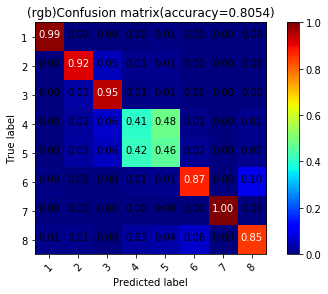

In [4]:
# 原色  rgb  讀入

path=os.getcwd()+'\\DATA\\picture02' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
#print ('Images are all in read_images')
#print(read_images.shape)   

######################################################
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)

#print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
#print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
#print('Shape of y_train is (%d,%d)'%(y_train.shape))
#print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
#print('Shape of y_train is (%d,%d)'%(y_train.shape))
###############################################################################################
model_rgb=load_model(r'C:\Users\user\Desktop\project\compare\model_inv3_rgb.hdf5') 
a=model_rgb.evaluate(x_test,y_test)
plot_confuse(model_rgb, x_test, y_test,round(a[1],4))

In [5]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('(gray)'+title+'(accuracy='+str(acc)+')')
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_inv3_gray_50.jpg') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)

8000/8000 [==============================] - 6s 711us/sample - loss: 0.8988 - acc: 0.7678


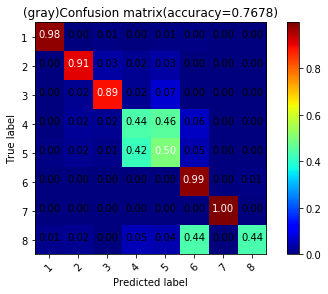

In [6]:
# 灰色讀入

path='C:\\Users\\user\\Desktop\\project\\picture_2' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)

######################################################

x = read_images
y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()
y_test = onehot.fit_transform(y_test).toarray()

#####################################################################################
model_gray=load_model(r'C:\Users\user\Desktop\project\compare\model_inv3_gray.hdf5') 
a=model_gray.evaluate(x_test,y_test)
plot_confuse(model_gray, x_test, y_test,round(a[1],4))

In [7]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('(hsl)'+title+'(acc='+str(acc)+')')
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_inv3_hsl_50.jpg') 
    plt.show()  
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
       

8000/8000 [==============================] - 8s 970us/sample - loss: 1.2475 - acc: 0.7180


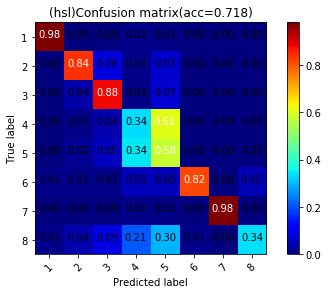

In [9]:
# HSl讀入

path='C:\\Users\\user\\Desktop\\project\\picture_2' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
    read_images.append(img)
read_images = np.array(read_images)


######################################################

x = read_images


y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()


# hsl
model_hsl=load_model(r'C:\Users\user\Desktop\project\compare\model_inv3_hsl.hdf5') 
a=model_hsl.evaluate(x_test,y_test)
plot_confuse(model_hsl, x_test, y_test,round(a[1],4))

In [10]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('(hsv)'+title+'(acc='+str(acc)+')')
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_inv3_hsv_50.jpg') 
    plt.show()  
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)

8000/8000 [==============================] - 8s 1ms/sample - loss: 0.7376 - acc: 0.7990


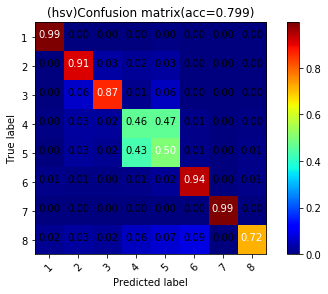

In [11]:

# HSV讀入

path='C:\\Users\\user\\Desktop\\project\\picture_2' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    read_images.append(img)
read_images = np.array(read_images)
 

######################################################

x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)


onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()
y_test = onehot.fit_transform(y_test).toarray()



####################################################################################

# hsv
model_hsv=load_model(r'C:\Users\user\Desktop\project\compare\model_inv3_hsv.hdf5') 

a=model_hsv.evaluate(x_test,y_test)
plot_confuse(model_hsv, x_test, y_test,round(a[1],4))

In [12]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('(lab)'+title+'(acc='+str(acc)+')')
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_inv3_lab_50.jpg') 
    plt.show()  
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)

8000/8000 [==============================] - 9s 1ms/sample - loss: 0.8404 - acc: 0.7950 0s - loss: 0.8338 - a


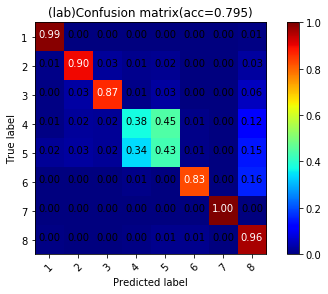

In [13]:

# LAB讀入

path='C:\\Users\\user\\Desktop\\project\\picture_2' #PICTURE2
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    read_images.append(img)
read_images = np.array(read_images)
  

######################################################

x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,3)
x_train = x_train.reshape(x_train.shape[0],100,100,3)


onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()

#lab
model_lab=load_model(r'C:\Users\user\Desktop\project\compare\model_inv3_lab.hdf5') 


a=model_lab.evaluate(x_test,y_test)
plot_confuse(model_lab, x_test, y_test,round(a[1],4))